4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/10
235/235 [==============================] - 8s 21ms/step - loss: 0.4155 - val_loss: 0.3410
Epoch 2/10
235/235 [==============================] - 4s 17ms/step - loss: 0.3261 - val_loss: 0.3177
Epoch 3/10
235/235 [==============================] - 4s 16ms/step - loss: 0.3095 - val_loss: 0.3066
Epoch 4/10
235/235 [==============================] - 4s 18ms/step - loss: 0.3010 - val_loss: 0.3001
Epoch 5/10
235/235 [==============================] - 4s 17ms/step - loss: 0.2955 - val_loss: 0.2956
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.2921 - val_loss: 0.2929
Epoch 7/10
235/235 [==============================] - 4s 16ms/step - loss: 0.2898 - val_loss: 0.2910
Epoch 8/10
235/235 [==============================] - 4s 17ms/step - loss: 0.2878 - val_loss: 0.2892
Epoch 9/10
235/235 [==============================] - 4s 17ms/step - loss: 0.2865 - val_loss: 0.2884
Epoch 10/10
313/313 [=======

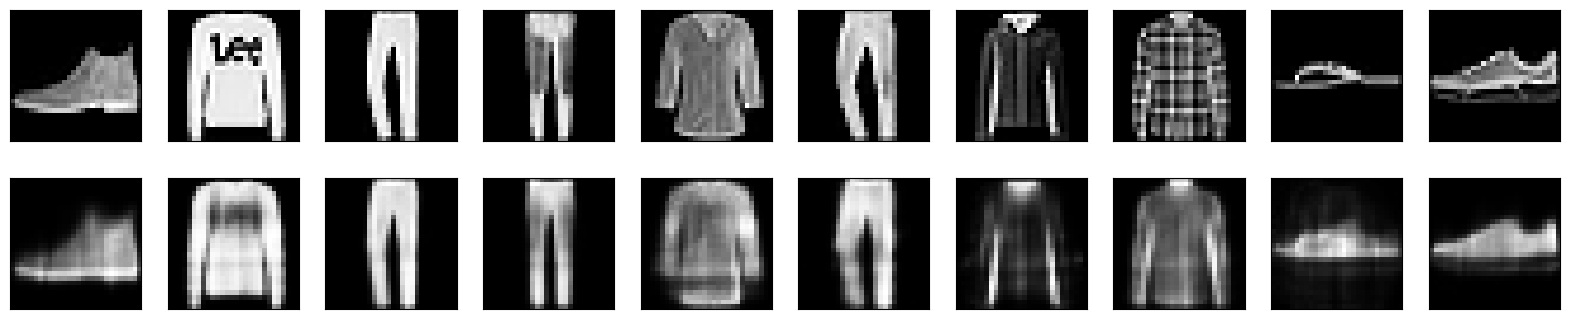

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist



# Load and preprocess the dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Build the autoencoder model
input_size = 784  # 28x28 images
encoding_dim = 32  # Size of the encoded representations

# Encoder model
input_img = Input(shape=(input_size,))
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoder model
decoded = Dense(input_size, activation='sigmoid')(encoded)

# Combine encoder and decoder to create autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some images
encoded_imgs = autoencoder.predict(x_test)

# Plot the results
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In [4]:

autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
